In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import decoupler as dc

In [2]:
out_dir = '../../results/07_marchphages/11_tf_enrichment'
os.makedirs(out_dir, exist_ok=True)

In [3]:
adata = sc.read_h5ad('../../results/07_marchphages/02_annotate/adata.h5ad')

In [4]:
net = dc.get_collectri(organism='human', split_complexes=False)

In [5]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

913 features of mat are empty, they will be removed.
Running ulm on mat with 1618 samples and 14362 targets for 671 sources.


  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
adata.obsm['ulm_estimate']

,ABL1,AEBP1,AHR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,...,ZNF382,ZNF384,ZNF395,ZNF423,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
49474,-0.257109,-0.181784,1.870219,0.181786,2.230475,5.591230,3.945920,0.544243,-0.358549,-0.331935,...,0.428544,-0.384869,-0.331942,-0.302971,-0.331939,1.972138,-0.110621,-0.110621,0.494784,-0.303010
49483,-0.244950,-0.173187,-0.558825,0.173189,-0.433387,4.118204,0.950209,0.509139,-0.341591,-0.316237,...,0.408277,1.486438,-0.316243,-0.288641,2.614326,1.619409,-0.105389,-0.105390,1.034969,3.962912
56073,-0.257822,2.795762,-1.250008,0.182290,-0.456162,1.166068,0.663743,0.704768,-0.359543,-0.332855,...,0.429732,1.333273,-0.332862,-0.303811,-0.332859,-0.816161,-0.110928,-0.110928,2.882771,2.674509
56152,1.859914,-0.181981,-0.199265,0.181982,1.273467,2.746216,3.544686,0.634176,-0.358936,-0.332293,...,-1.688370,-0.385285,-0.332300,-0.303299,-0.332297,2.773767,3.202808,2.622531,1.699711,2.691401
56167,1.116933,3.680262,2.067185,0.238194,5.828328,3.745596,1.457655,1.044751,-0.469806,-0.434934,...,0.561523,-0.504294,-0.434942,-0.396983,-0.434939,0.683882,-0.144947,-2.021698,2.613408,1.659114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTCAAAGAATCTCC-1_21,-0.298615,-0.211130,1.001544,0.211132,5.610025,5.646918,5.521239,4.111999,-0.416432,-0.385522,...,-1.379872,-0.447001,-0.385527,-0.351882,-0.385525,1.256057,2.834544,-3.091718,-0.820384,5.906830
TTCTCAAAGTGTGGCA-1_21,3.503662,3.193778,5.645249,1.750441,5.542061,9.351483,5.682184,4.980507,2.186855,1.280725,...,-1.529105,0.138431,-0.775560,-0.707878,0.865193,1.778356,-1.104320,-2.075066,1.164964,5.335743
TTCTTAGAGCTGATAA-1_21,0.989547,1.642363,4.272770,0.242994,7.110329,8.936902,5.500344,3.733008,1.114354,-0.443699,...,-0.760463,1.662787,-0.443704,-0.404982,-0.443703,-0.039486,-0.147867,-0.147867,0.366531,3.158033
TTGGAACCACAGCGTC-1_21,0.992998,0.917379,4.252707,0.438643,4.788628,7.894286,5.470819,5.141298,0.699329,0.043930,...,-1.963943,-0.394340,-0.800971,-0.731071,0.888834,0.268369,-0.266923,-0.266930,0.939556,4.404837


In [7]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 1618 × 15275
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters', 'annotation'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'annotation_colors', 'cell_type_colors', 'condition_colors', 'data_colors', 'dendrogram_annotation', 'dendrogram_sub_clusters', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sub_clusters_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'
    varm: 'PCs'
    layers: 'counts'
 

In [8]:
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts

AnnData object with n_obs × n_vars = 1618 × 671
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters', 'annotation'
    uns: 'annotation_colors', 'cell_type_colors', 'condition_colors', 'data_colors', 'dendrogram_annotation', 'dendrogram_sub_clusters', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sub_clusters_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'

In [9]:
df = dc.rank_sources_groups(acts, groupby='annotation', reference='rest', 
                            method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,Antigen-presenting,rest,NAB2,11.560239,1.357893,2.098624e-27,9.779003e-27
1,Antigen-presenting,rest,FEV,11.026742,0.833392,2.389832e-25,1.034566e-24
2,Antigen-presenting,rest,HDAC1,10.086191,1.086333,4.196667e-22,1.666251e-21
3,Antigen-presenting,rest,FOXG1,9.834878,0.618348,5.421417e-21,2.020984e-20
4,Antigen-presenting,rest,SATB2,9.640691,0.681428,2.034519e-20,7.339584e-20
...,...,...,...,...,...,...,...
2008,Pro-inflammatory,rest,ING4,-12.797689,-0.945015,1.044878e-35,4.494315e-35
2009,Pro-inflammatory,rest,MEIS1,-12.885656,-1.151550,3.930221e-36,1.701405e-35
2010,Pro-inflammatory,rest,FEV,-13.093394,-0.678239,3.445700e-37,1.521095e-36
2011,Pro-inflammatory,rest,SMAD6,-13.250081,-0.590972,5.174773e-38,2.346130e-37


In [12]:
n_markers = 5
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'Antigen-presenting': ['NAB2', 'FEV', 'HDAC1', 'FOXG1', 'SATB2'],
 'Phagocytic': ['SETBP1', 'BCL6', 'ZNF143', 'NR1H4', 'GLI2'],
 'Pro-inflammatory': ['REL', 'RELA', 'CREB1', 'RELB', 'EGR1']}

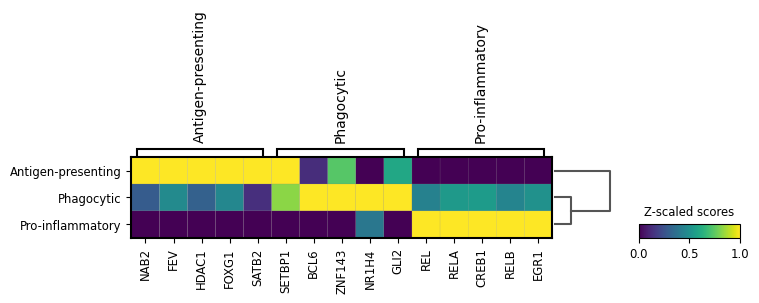

In [13]:
sc.pl.matrixplot(acts, source_markers, 'annotation', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores')

In [14]:
acts.write_h5ad(f'{out_dir}/act.h5ad')